Decision Tree Accuracy: 0.93


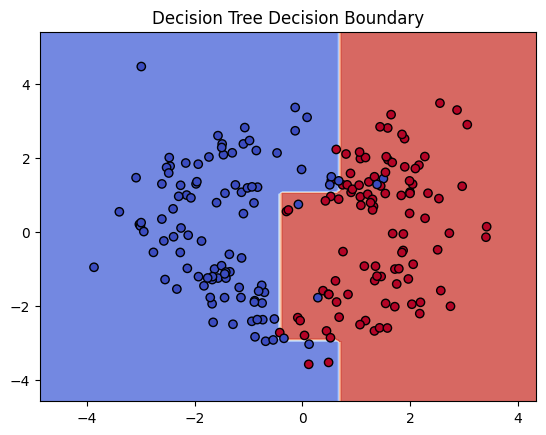

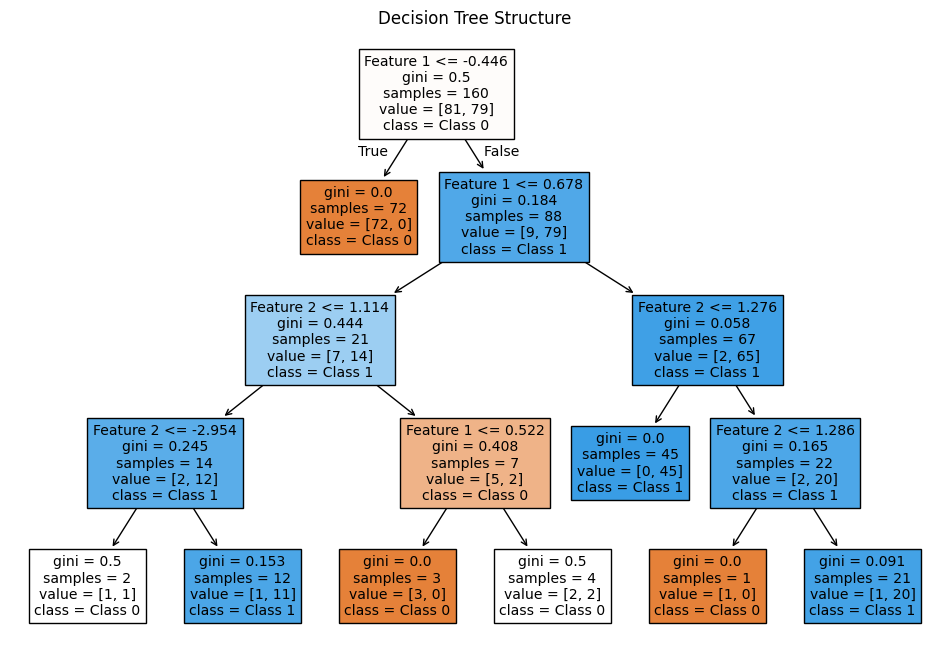

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42,
    class_sep=1.5  
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tree = DecisionTreeClassifier(max_depth=4, random_state=42)  # 限制最大深度
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title("Decision Tree Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, tree)


plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Structure")
plt.show()
